## matplotlib.axes.Axes.fill_between

#### Axes.fill_between(self, x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)

Fill the area between two horizontal curves.

The curves are defined by the points (x, y1) and (x, y2). This creates one or multiple polygons describing the filled area.

You may exclude some horizontal sections from filling using where.

By default, the edges connect the given points directly. Use step if the filling should be a step function, i.e. constant in between x.

### Filling the area between lines

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 1.2 * np.sin(4 * np.pi * x)

Text(0.5, 0, 'x')

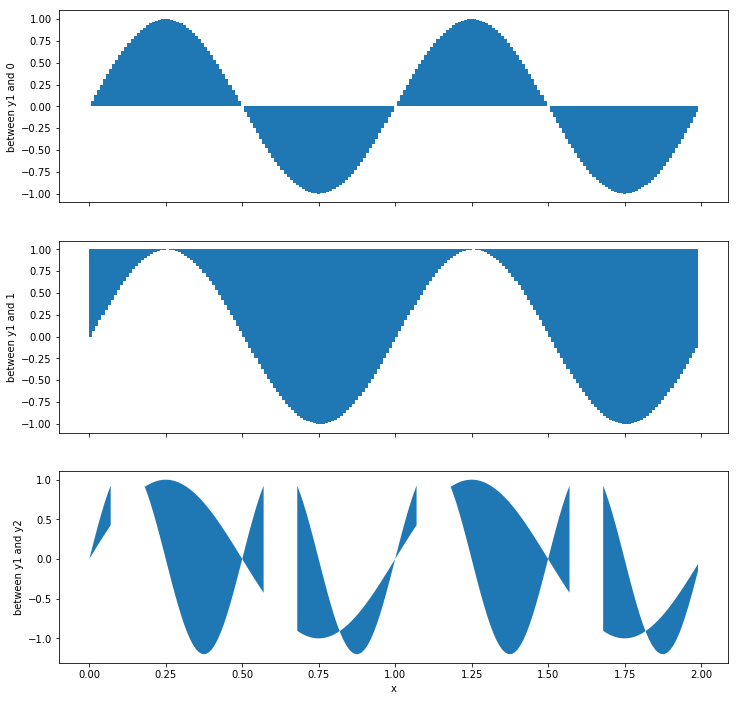

In [108]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(12, 12))
#plt.ylim(-2, 2)
ax1.fill_between(x, 0, y1 , step='mid')
ax1.set_ylabel('between y1 and 0')

ax2.fill_between(x, y1, 1, step='post') #step : {'pre', 'post', 'mid'}, optional
ax2.set_ylabel('between y1 and 1')


ax3.fill_between(x, y1, y2)
ax3.set_ylabel('between y1 and y2')
ax3.set_xlabel('x')

Now fill between y1 and y2 where a logical condition is met. Note this is different than calling fill_between(x[where], y1[where], y2[where] ...) because of edge effects over multiple contiguous regions.

Text(0.5, 1.0, 'Now regions with y2>1 are masked')

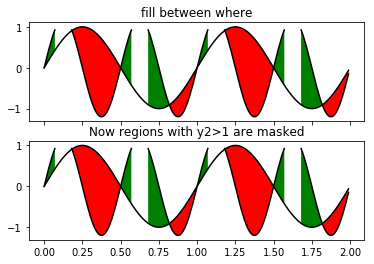

In [85]:
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
ax.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax.set_title('fill between where')

# Test support for masked arrays.
y2 = np.ma.masked_greater(y2, 1.0)
ax1.plot(x, y1, x, y2, color='black')
ax1.fill_between(x, y1, y2, where=y2 >= y1,
                 facecolor='green', interpolate=True)
ax1.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax1.set_title('Now regions with y2>1 are masked')

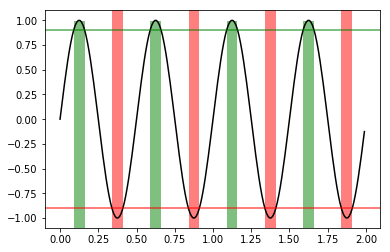

In [71]:
fig, ax = plt.subplots()
y = np.sin(4 * np.pi * x)
ax.plot(x, y, color='black')

# use data coordinates for the x-axis and the axes coordinates for the y-axis
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.9
ax.axhline(theta, color='green', lw=2, alpha=0.5)
ax.axhline(-theta, color='red', lw=2, alpha=0.5)
ax.fill_between(x, -0.9, 0.95, where=y > theta,
                facecolor='green', alpha=0.5, transform=trans)
ax.fill_between(x, 0, 1, where=y < -theta,
                facecolor='red', alpha=0.5, transform=trans)


plt.show()

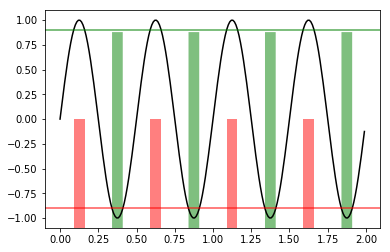

In [81]:
fig, ax = plt.subplots()
y = np.sin(4 * np.pi * x)
ax.plot(x, y, color='black')

# use data coordinates for the x-axis and the axes coordinates for the y-axis
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.9
ax.axhline(theta, color='green', lw=2, alpha=0.5)
ax.axhline(-theta, color='red', lw=2, alpha=0.5)
ax.fill_between(x, y, theta, where=y < -theta,
                facecolor='green', alpha=0.5, transform=trans)
ax.fill_between(x, -0.7, 0.5, where=y > theta,
                facecolor='red', alpha=0.5, transform=trans)


plt.show()

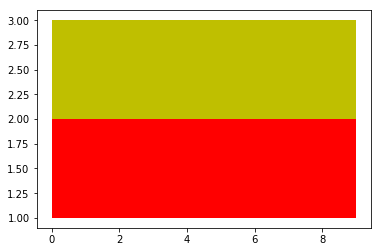

In [115]:
fig, ax = plt.subplots()
x = np.arange(10)
ax.fill_between(x, 1, 2, facecolor='red')
ax.fill_between(x, 2, 3, facecolor='y')

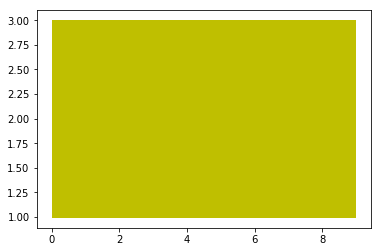

In [116]:
fig, ax = plt.subplots()
x = np.arange(10)
ax.fill_between(x, 1, 2, facecolor='red')
ax.fill_between(x, 0.99, 3, facecolor='y') # overlapping